# HW9. 홉필드 모형을 이용한 패턴인식

1. 홉필드 모형을 이용한 패턴인식 알고리즘의 유효범위를 조사하세요. \\
1) 랜덤한 N차원 패턴 p개를 형성하는 함수를 정의하세요. [10점] \\
2) 출력 패턴과 정답 패턴의 차이를 N으로 나눈 것을 오차로 정의합니다. 오차의 허용범위를 0.05 $\sim$ 0.5로 변화
시키면서 가능한 학습가능 패턴 수를 계산하세요. (해당 문제에서 L=8, N=L^2로 둡니다.) 결과를 오차 허용범위 vs 학습 가능 패턴수의 그래프로 그리세요. [50점]


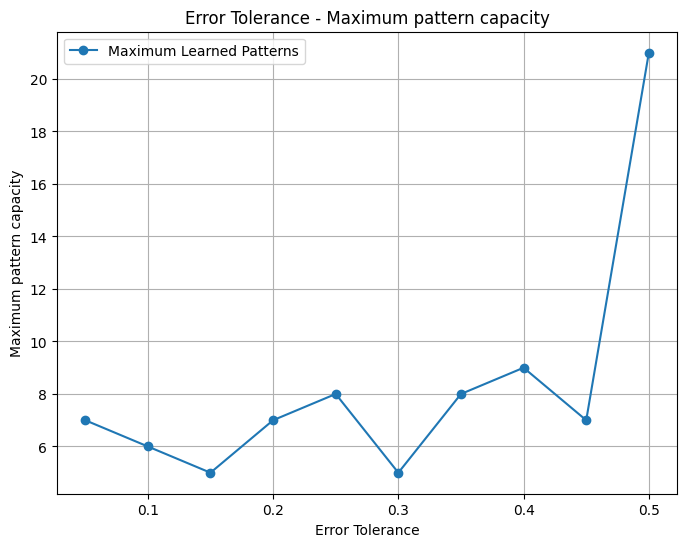

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 8
N = L * L
MaxStep = 5
Noise = 0.2
tolerances = np.linspace(0.05, 0.5, 10)

max_patterns = []

for tor in tolerances:
    patterns = 0
    for p in range(1, N+1):
        success = True
        xi = np.random.choice([-1, 1], size=[p, N])
        J = (xi.T @ xi) / p

        for beta in range(p):
            S = xi[beta].copy()

            for i in range(N):
                if np.random.rand() < Noise:
                    S[i] *= -1

            F = J@S
            for counter in range(MaxStep):
                for k in range(N):
                    dE = 2 * (F[k] * S[k] - J[k][k])
                    if dE < 0:
                        for i in range(N):
                            F[i] -= 2 * J[i][k] * S[k]
                        S[k] *= -1

            Error = np.sum(S != xi[beta]) / N
            if Error > tor:
                success = False
                break

        if not success:
            break
        patterns = p

    max_patterns.append(patterns)

plt.figure(figsize=(8, 6))
plt.plot(tolerances, max_patterns, marker='o', label="Maximum Learned Patterns")
plt.title("Error Tolerance - Maximum pattern capacity")
plt.xlabel("Error Tolerance")
plt.ylabel("Maximum pattern capacity")
plt.grid(True)
plt.legend()
plt.show()


위의 코드는 오차의 허용범위에 따른 홉필드 모형의 최대 학습 가능 패턴수를 계산한 뒤 이를 그래프로 나타내는 코드이다. 변수 L은 차원(격자의 크기)을 나타내며 문제에서 주어진대로 8로 설정하였으며, 변수 N은 뉴런의 총 개수로 L*L로 설정하였다. 변수 MaxStep은 업데이트 단계의 반복횟수를 나타내며 5로 설정하였으며, 변수 Noise는 원본패턴에 노이즈를 첨가할 확률로, 문제에서 주어진대로 0.2로 설정하였다. tolerances는 허용 오차율을 저장한 배열로, 0.05에서 0.5까지의 값을 0.05 간격으로 저장하였다. 리스트 max_patterns는 각 오차율에 따른 최대 학습가능 패턴수를 저장한다. \\
for문을 통해 배열 tolerances내의 오차율값 tor에 따라 패턴의 개수를 1에서 N개까지 변화시켜가며 모든 패턴들에 대해서 오차율을 만족하는지 확인하였으며, 모든 패턴들에 대해서 오차율을 만족하면 그떄의 p값을 최대 학습가능 패턴수로 저장하였다. for문 내의 변수 patterns는 최대 학습가능 패턴의 갯수를 저장하며, 초깃값은 0으로 설정하였다. 이후 랜덤한 패턴의 개수 p를 1에서 N까지 변화시켜가며 모든 패턴에 대해 홉필드 모형을 이용한 패턴인식 알고리즘을 적용시켜 모든 패턴의 출력패턴과 정답패턴의 차이가 오차보다 적으면 그때의 p값을 patterns에 저장하였다. \\
p에 관한 for문 내의 변수 success는 모든 패턴의 오차 차이가 tor보다 적은지 확인하기 위한 변수로 초깃값은 True로 설정하였다. 변수 xi는 -1과 1로 이루어진 랜덤한 N차원 패턴 p개를 형성하여 저장한다. 변수 J는 상호작용을 나타내는 값으로 $$J_{ij} = \dfrac{1}{p}\sum^p_{\alpha = 1}\xi_i^{(\alpha)}\xi_j^{(\alpha)}$$의 값을 저장한다. 이후 beta에 관한 for문을 통해 p개의 전체 패턴들에 대해 홉필드 모형을 통한 패턴인식 알고리즘을 적용한다. 변수 S는 xi의 beta번째 원소를 복사하여 저장하며, 이후 S의 모든 원소에 대해 20%의 확률로 노이즈를 추가하였다. 변수 F는 S의 모든 성분의 국소자기장을 계산하여 저장하며 $$F_k = \sum_iJ_{ki}S_i$$식을 따른다. 이후 counter에 따른 for문을 통해 MaxSteps만큼 에너지차이를 계산하여 S값을 업데이트 한다. S내의 모든 원소에 대해 $$\Delta E = 2(F_kS_k-J_{kk})$$의 공식을 통해 에너지 차이를 계산하여 만약 에너지 차이가 0보다 작으면 S의 모든원소에 대해 $$\Delta F_i = -J_{ik}S_k$$의 공식을 통해 $F_i$의 값을 새로 변경한 뒤 스핀을 변경하였다. \\
이후 정답패턴과 출력패턴의 차이를 N으로 나눈값을 변수 Error에 저장하여 만약 Error의 값이 tor보다 크면 success의 값을 False로 바꾼 뒤 break하여 다음 p값으로 넘어가게 하였으며, 만약 모든 패턴들에 대해 Error가 tor보다 작으면 patterns에 p를 저장하도록 했다. 이후 p에 대한 for문이 끝난 뒤 patterns값을 max_patterns에 저장하였다. \\
최종적으로 x축이 tolerances이고 y축이 max_patterns인 그래프를 작성하였다.

3) 2번의 결과에서 ‘적당한’ 오차를 하나 정하세요. 이번에는 L=1 $\sim$ 10 (L^2=N)으로 변화시켜가며 학습가능 패턴
수를 계산하세요. 결과를 N vs 학습가능 패턴수의 그래프로 그리세요. [40점] 해당 결과가 이론값 y=0.138*x
의 그래프와 잘 맞는지 확인하세요. [10점]

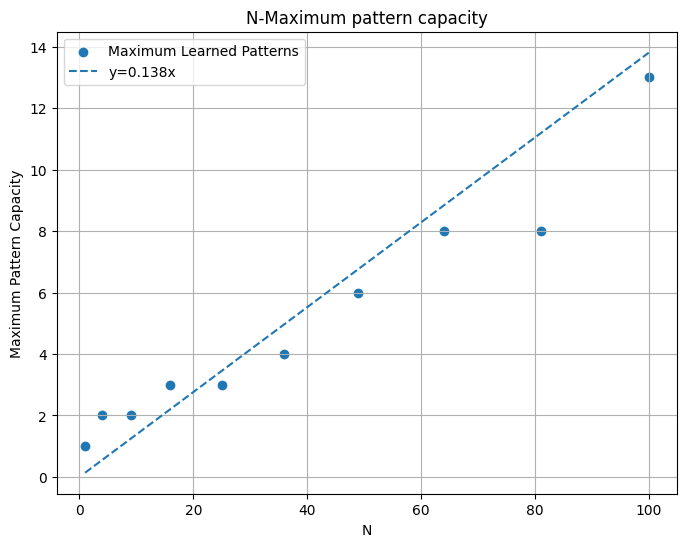

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L_arr = np.arange(1,11,1)
MaxStep = 5
Noise = 0.2
tor = 0.3

max_patterns = []

for L in L_arr:
    patterns = 0
    N = L*L
    for p in range(1, N+1):
        success = True
        xi = np.random.choice([-1, 1], size=[p, N])
        J = (xi.T @ xi) / p

        for beta in range(p):
            S = xi[beta].copy()

            for i in range(N):
                if np.random.rand() < Noise:
                    S[i] *= -1
            F = J@S
            for counter in range(MaxStep):
                for k in range(N):
                    dE = 2 * (F[k] * S[k] - J[k][k])
                    if dE < 0:
                        for i in range(N):
                            F[i] -= 2 * J[i][k] * S[k]
                        S[k] *= -1

            Error = np.sum(S != xi[beta])/N
            if Error > tor:
                success = False
                break
        if not success:
            break
        patterns = p
    max_patterns.append(patterns)

theoretical_values = [0.138 * (L**2) for L in L_arr]

plt.figure(figsize=(8, 6))
plt.scatter([L**2 for L in L_arr], max_patterns, marker='o', label="Maximum Learned Patterns")
plt.plot([L**2 for L in L_arr], theoretical_values, linestyle='--', label="y=0.138x")
plt.title("N-Maximum pattern capacity")
plt.xlabel("N")
plt.ylabel("Maximum Pattern Capacity")
plt.grid(True)
plt.legend()
plt.show()


위의 코드는 L값을 1에서 10으로 변화시켜가며 최대 학습가능 패턴수를 계산한 뒤 이를 N과 최대 학습가능 패턴수에 대한 그래프로 나타낸 코드이다. 위 코드의 전반적인 구조와 초깃값은 이전 문제와 동일하다. 배열 L_arr는 1$\sim$10의 L값을 저장하며, 변수 MaxSteps와 Noise는 1번 문제와 동일하게 설정하였다. 오차율 tor는 적절히 0.3으로 가정하였다. 리스트 max_patterns는 각 L값에 따른 최대 학습가능 패턴수를 저장한다. 이후 L값에 따른 for문을 통해 L_arr내의 L값을 변화시켜가며 최대 학습가능한 패턴수를 계산하였다. for문 내의 코드는 1번문제와 동일하다. 이를 통해 각 L값에 따른 최대 학습가능 패턴수를 리스트 max_patterns에 저장하였다. 리스트 theoretical_values는 이론값인 $y=0.138x$값을 L값에 따라 저장한다. 이후 x축이 N(=L*L)이고 y축이 max_patterns인 산포도를 작성하였으며, 산포도와 함께 x축이 N이고 y축이 theoretical_values인 이론값 그래프를 점선으로 표현하였다. \\
본 과정을 통해 도출된 그래프를 통해 N값에 따른 최대 학습가능 패턴수가 이론값인 $y=0.138N$과 거의 유사한 경향을 보임을 확인할 수 있었으며, 이론과 본 과제의 결괏값이 잘 맞아떨어짐을 확인할 수 있었다.